<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

**Entregable 2 - Parte 2**

**Grupo 27:**

**Guillermo Alonso**

**María Eugenia Bernaschini**

**Juan Cruz Bordón**

**Javier Carabajal**

----

# Trabajo práctico entregable - parte 2


En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.** que fue guardado en un archivo (Ejercicio 3 entregable 1). 


In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Importamos desde nuestra compu la base construida en el entregable 1
from google.colab import files
uploaded = files.upload()

Saving melb_data_extended_correccion.csv to melb_data_extended_correccion.csv


In [3]:
# Cargamos la base en pandas del entregable 1 (la llamaremos melb_df_ext)
import io
melb_df_ext= pandas.read_csv(io.BytesIO(uploaded['melb_data_extended_correccion.csv']), encoding='utf-8')


In [4]:
len(melb_df_ext)

13096

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [5]:
# Selección de variables
categorical_cols = ['Type','Suburb','Regionname']
numerical_cols = ['Rooms','Price','Distance','Postcode','Bedroom2','Bathroom','Landsize','Lattitude','Longtitude','Car','airbnb_price_median','airbnb_record_count']
ay_cols = ['BuildingArea','YearBuilt']
new_columns = []

In [6]:
# Cantidad de niveles en cada categoría
melb_df_ext[categorical_cols].nunique()

Type            3
Suburb        212
Regionname      7
dtype: int64

In [7]:
# Cantidad de NAs para las variables categóricas
melb_df_ext[categorical_cols].isna().sum()

Type          0
Suburb        0
Regionname    0
dtype: int64

In [8]:
# Cantidad de NAs para las variables numéricas
melb_df_ext[numerical_cols].isna().sum()

Rooms                    0
Price                    0
Distance                 0
Postcode                 0
Bedroom2                 0
Bathroom                 0
Landsize                 0
Lattitude                0
Longtitude               0
Car                     60
airbnb_price_median    311
airbnb_record_count    311
dtype: int64

Antes de codificar las variables categóricas vamos a reducir el número de categorías únicas para Suburb. Nos quedaremos con las 50 más frecuentes y al resto de Suburbs los agruparemos en 'otros' para no perder información. Por lo tanto, tendremos 51 niveles únicos para Suburb.

In [9]:
# Frecuencias absolutas Suburb para melb_df_ext
Suburb_count = melb_df_ext.Suburb.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'Suburb', 'Suburb': 'frequency'})
Suburb_count[:51]

,Suburb,frequency
0,Reservoir,359
1,Richmond,260
2,Bentleigh East,249
3,Preston,239
4,Brunswick,222
5,Essendon,220
6,South Yarra,201
7,Glen Iris,195
8,Coburg,190
9,Northcote,187


In [10]:
# Agrupamos los suburbs menos frecuentes en 'others'
series = pandas.value_counts(melb_df_ext.Suburb)
mask = series.lt(90)
# To replace df['column'] use np.where I.e 
melb_df_ext['Suburb'] = numpy.where(melb_df_ext['Suburb'].isin(series[mask].index),'Other',melb_df_ext['Suburb'])

In [11]:
mask

Reservoir         False
Richmond          False
Bentleigh East    False
Preston           False
Brunswick         False
                  ...  
Watsonia North     True
Tarneit            True
Ringwood North     True
Travancore         True
Rowville           True
Name: Suburb, Length: 212, dtype: bool

In [12]:
# Frecuencias absolutas Suburb para melb_df_ext luego de generar el nivel 'Other'
Suburb_count = melb_df_ext.Suburb.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'Suburb', 'Suburb': 'frequency'})
Suburb_count[:51]

,Suburb,frequency
0,Other,5626
1,Reservoir,359
2,Richmond,260
3,Bentleigh East,249
4,Preston,239
5,Brunswick,222
6,Essendon,220
7,South Yarra,201
8,Glen Iris,195
9,Coburg,190


In [13]:
# Cantidad de niveles en cada categoría
melb_df_ext[categorical_cols].nunique()

Type           3
Suburb        51
Regionname     7
dtype: int64

In [14]:
len(melb_df_ext)

13096

In [15]:
# Codificación de las variables categóricas
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df_ext[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))


Matrix has shape (13096, 61), with columns: ['Type=h', 'Type=t', 'Type=u', 'Suburb=Armadale', 'Suburb=Ascot Vale', 'Suburb=Balwyn', 'Suburb=Balwyn North', 'Suburb=Bentleigh', 'Suburb=Bentleigh East', 'Suburb=Brighton', 'Suburb=Brighton East', 'Suburb=Brunswick', 'Suburb=Brunswick West', 'Suburb=Camberwell', 'Suburb=Carnegie', 'Suburb=Coburg', 'Suburb=Doncaster', 'Suburb=Elwood', 'Suburb=Essendon', 'Suburb=Fawkner', 'Suburb=Fitzroy North', 'Suburb=Footscray', 'Suburb=Glen Iris', 'Suburb=Glenroy', 'Suburb=Hampton', 'Suburb=Hawthorn', 'Suburb=Hawthorn East', 'Suburb=Ivanhoe', 'Suburb=Keilor East', 'Suburb=Kensington', 'Suburb=Kew', 'Suburb=Maidstone', 'Suburb=Malvern East', 'Suburb=Maribyrnong', 'Suburb=Moonee Ponds', 'Suburb=Newport', 'Suburb=Northcote', 'Suburb=Other', 'Suburb=Pascoe Vale', 'Suburb=Port Melbourne', 'Suburb=Prahran', 'Suburb=Preston', 'Suburb=Reservoir', 'Suburb=Richmond', 'Suburb=South Yarra', 'Suburb=St Kilda', 'Suburb=Sunshine', 'Suburb=Surrey Hills', 'Suburb=Templest

In [16]:
len(new_columns)

61

In [17]:
X_cat[:10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0

In [18]:
# Agregado de las variables numéricas
X = numpy.hstack([X_cat, melb_df_ext[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X.shape, new_columns))


Matrix has shape (13096, 73), with columns: ['Type=h', 'Type=t', 'Type=u', 'Suburb=Armadale', 'Suburb=Ascot Vale', 'Suburb=Balwyn', 'Suburb=Balwyn North', 'Suburb=Bentleigh', 'Suburb=Bentleigh East', 'Suburb=Brighton', 'Suburb=Brighton East', 'Suburb=Brunswick', 'Suburb=Brunswick West', 'Suburb=Camberwell', 'Suburb=Carnegie', 'Suburb=Coburg', 'Suburb=Doncaster', 'Suburb=Elwood', 'Suburb=Essendon', 'Suburb=Fawkner', 'Suburb=Fitzroy North', 'Suburb=Footscray', 'Suburb=Glen Iris', 'Suburb=Glenroy', 'Suburb=Hampton', 'Suburb=Hawthorn', 'Suburb=Hawthorn East', 'Suburb=Ivanhoe', 'Suburb=Keilor East', 'Suburb=Kensington', 'Suburb=Kew', 'Suburb=Maidstone', 'Suburb=Malvern East', 'Suburb=Maribyrnong', 'Suburb=Moonee Ponds', 'Suburb=Newport', 'Suburb=Northcote', 'Suburb=Other', 'Suburb=Pascoe Vale', 'Suburb=Port Melbourne', 'Suburb=Prahran', 'Suburb=Preston', 'Suburb=Reservoir', 'Suburb=Richmond', 'Suburb=South Yarra', 'Suburb=St Kilda', 'Suburb=Sunshine', 'Suburb=Surrey Hills', 'Suburb=Templest

In [19]:
len(new_columns)

73

In [20]:
X[:10]

array([[ 1.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  1.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         1.000000e+00,  0.000000e+00,  0.000000e

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [21]:
# Agregamos las columnas YearBuilt y BuildingArea
X2 = numpy.hstack([X, melb_df_ext[ay_cols].values])
new_columns.extend(ay_cols)
print("Matrix has shape {}, with columns: {}".format(X2.shape, new_columns))


Matrix has shape (13096, 75), with columns: ['Type=h', 'Type=t', 'Type=u', 'Suburb=Armadale', 'Suburb=Ascot Vale', 'Suburb=Balwyn', 'Suburb=Balwyn North', 'Suburb=Bentleigh', 'Suburb=Bentleigh East', 'Suburb=Brighton', 'Suburb=Brighton East', 'Suburb=Brunswick', 'Suburb=Brunswick West', 'Suburb=Camberwell', 'Suburb=Carnegie', 'Suburb=Coburg', 'Suburb=Doncaster', 'Suburb=Elwood', 'Suburb=Essendon', 'Suburb=Fawkner', 'Suburb=Fitzroy North', 'Suburb=Footscray', 'Suburb=Glen Iris', 'Suburb=Glenroy', 'Suburb=Hampton', 'Suburb=Hawthorn', 'Suburb=Hawthorn East', 'Suburb=Ivanhoe', 'Suburb=Keilor East', 'Suburb=Kensington', 'Suburb=Kew', 'Suburb=Maidstone', 'Suburb=Malvern East', 'Suburb=Maribyrnong', 'Suburb=Moonee Ponds', 'Suburb=Newport', 'Suburb=Northcote', 'Suburb=Other', 'Suburb=Pascoe Vale', 'Suburb=Port Melbourne', 'Suburb=Prahran', 'Suburb=Preston', 'Suburb=Reservoir', 'Suburb=Richmond', 'Suburb=South Yarra', 'Suburb=St Kilda', 'Suburb=Sunshine', 'Suburb=Surrey Hills', 'Suburb=Templest

In [22]:
len(new_columns)

75

In [23]:
X2[:10]

array([[ 1.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  1.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
         1.000000e+00,  0.000000e+00,  0.000000e

In [24]:
X2[:,-2]

array([ nan,  79., 150., ...,  nan, 157., 112.])

A continuación escalamos la matriz X2 entre 0 y 1 para luego implementar la imputación:

In [25]:
# Escalado de la matriz
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_X2 = scaler.fit_transform(X2)
numpy.max(scaled_X2), numpy.min(scaled_X2)

(nan, nan)

In [26]:
scaled_X2[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

A continuación realizamos la imputación IterativeImputer con un estimador KNeighborsRegressor utilizando todas las columnas de la matriz. Al resultado lo llamaremos X_scaled_mice_full (full).

In [27]:
# Imputamos utilizando toda la matriz (full)
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

X_scaled_mice_full = scaled_X2.copy()

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
X_scaled_mice_full = mice_imputer.fit_transform(
    X_scaled_mice_full)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [28]:
# Matriz con las imputaciones utilizando todas las columnas (full)
X_scaled_mice_full[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

A continuación realizamos la imputación IterativeImputer con un estimador KNeighborsRegressor utilizando sólo todas las columnas que posee NANs  (YearBuilt, BuildingArea, car, airbnb_price_median y airbnb_record_count
from sklearn.experimental import enable_iterative_imputer). Al resultado lo llamaremos X_scaled_mice_nan (nan). 

In [29]:
# Imputamos utilizando las variables YearBuilt y BuildingArea y también las variables car, airbnb_price_median y airbnb_record_count
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

X_scaled_mice_nan = scaled_X2.copy()

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
X_scaled_mice_nan[:, [-5, -4, -3, -2, -1]] = mice_imputer.fit_transform(
    X_scaled_mice_nan[:, [-5, -4, -3, -2, -1]])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [30]:
# Matriz con las imputaciones utilizando sólo todas las columnas que tiene nans (nan)
X_scaled_mice_nan[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

A continuación realizamos la imputación IterativeImputer con un estimador KNeighborsRegressor utilizando sólo las columnas YearBuilt y BuildingArea. Al resultado lo llamaremos X_scaled_mice_nan2 (nan2).

In [31]:
# Imputamos utilizando sólo las variables YearBuilt y BuildingArea (nan2)
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

X_scaled_mice_nan2 = scaled_X2.copy()

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
X_scaled_mice_nan2[:, [-2, -1]] = mice_imputer.fit_transform(
    X_scaled_mice_nan2[:, [-2, -1]])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [32]:
# Matriz con las imputaciones utilizando sólo las columnas YearBuilt y BuildingArea (nan2)
X_scaled_mice_nan2[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

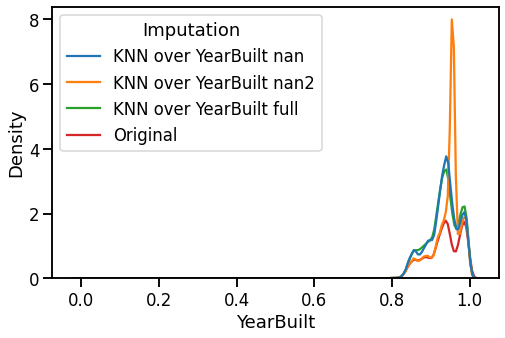

In [33]:
# Gráfico comparativo de distribuciones YearBuilt
melb_year_built = pandas.DataFrame(scaled_X2[:,-1])
melb_year_built.columns = ['YearBuilt']

mice_year_built_nan = pandas.DataFrame(X_scaled_mice_nan[:,-1])
mice_year_built_nan.columns = ['YearBuilt']

mice_year_built_nan2 = pandas.DataFrame(X_scaled_mice_nan2[:,-1])
mice_year_built_nan2.columns = ['YearBuilt']

mice_year_built_full = pandas.DataFrame(X_scaled_mice_full[:,-1])
mice_year_built_full.columns = ['YearBuilt']

mice_year_built_nan['Imputation'] = 'KNN over YearBuilt nan'
mice_year_built_nan2['Imputation'] = 'KNN over YearBuilt nan2'
mice_year_built_full['Imputation'] = 'KNN over YearBuilt full'
melb_year_built['Imputation'] = 'Original'
data = pandas.concat([mice_year_built_nan, mice_year_built_nan2, mice_year_built_full, melb_year_built], ignore_index= True)

fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

Las majores imputaciones son aquellas que más aproximan su distribución a la distribución original (roja).
Para la variable YearBuilt se observa del gráfico que la imputación que utiliza toda la matriz (full) es mejor que la que utiliza todas las columnas que tienen NANs (nan) y que la que utiliza sólo las columnas YearBuilt y BuldingArea (nan2). 

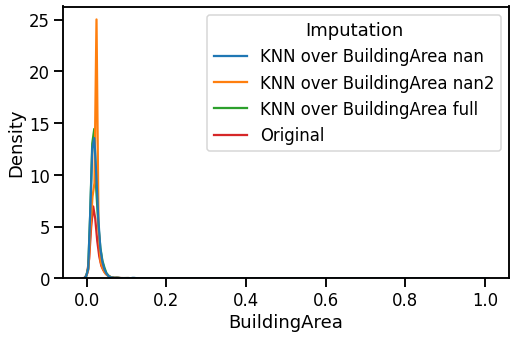

In [34]:
# Gráfico comparativo de distribuciones BuildingArea
mice_building_area_nan = pandas.DataFrame(X_scaled_mice_nan[:,-2])
mice_building_area_nan.columns = ['BuildingArea']

mice_building_area_nan2 = pandas.DataFrame(X_scaled_mice_nan2[:,-2])
mice_building_area_nan2.columns = ['BuildingArea']

mice_building_area_full = pandas.DataFrame(X_scaled_mice_full[:,-2])
mice_building_area_full.columns = ['BuildingArea']

melb_building_area = pandas.DataFrame(scaled_X2[:,-2])
melb_building_area.columns = ['BuildingArea']


mice_building_area_nan['Imputation'] = 'KNN over BuildingArea nan'
mice_building_area_nan2['Imputation'] = 'KNN over BuildingArea nan2'
mice_building_area_full['Imputation'] = 'KNN over BuildingArea full'
melb_building_area['Imputation'] = 'Original'
data = pandas.concat([mice_building_area_nan, mice_building_area_nan2, mice_building_area_full, melb_building_area],ignore_index= True)

fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='BuildingArea', hue='Imputation')


Para la variable BuildingArea se observa del gráfico que la imputación full es muy próxima a la imputación nan y ambas mejores que nan2.

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [35]:
X_scaled_mice_full.shape[0]

13096

In [36]:
# Cálculo de la cantidad de componentes principales
n = min(20, X_scaled_mice_full.shape[0])
n

20

Es recomendable estandarizar o escalar la matriz original para asegurar de que todas las variables estén en las mismas unidades y ninguna tenga un peso demasiado grande. Como vimos en la teoría, para este caso conviene realizar el escalado.

Utilizamos la matrix X_scaled_mice_full que ya se encuentra escalada y no tiene nans.





In [37]:
# Cálculo de las 20 componentes principales
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(X_scaled_mice_full)
proyected_features = pca.transform(X_scaled_mice_full)
proyected_features.shape

(13096, 20)

In [38]:
# Variabilidad explicada por cada componente
pca.explained_variance_ratio_

array([0.19929666, 0.14613651, 0.12379325, 0.10860814, 0.05418153,
       0.05062556, 0.02354075, 0.01744402, 0.01146073, 0.01049521,
       0.00887021, 0.00862896, 0.00812131, 0.00749363, 0.00727856,
       0.00707023, 0.00691161, 0.00663751, 0.00648832, 0.00615258])

In [39]:
proyected_features[:,[0,1,2,3,4]]

array([[-0.67407561,  0.44406354, -0.07815934, -0.55845874, -0.33703745],
       [-0.66758659,  0.46322396, -0.06610405, -0.552262  , -0.34285275],
       [-0.68589806,  0.426729  , -0.08261954, -0.5621731 , -0.32700953],
       ...,
       [-0.36095178, -0.28406285, -0.09556169,  0.97148796, -0.02085757],
       [-0.38443099, -0.3497855 , -0.13580138,  0.95165582, -0.00981675],
       [-0.43552551, -0.25062717, -0.08805364,  1.00448391, -0.02501939]])

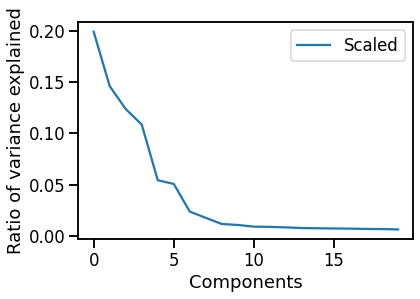

In [40]:
# Gráfico de la varianza capturada por cada componente
seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_, label='Scaled')
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")
plt.legend()

En base al gráfico seleccionamos las primeras 5 componentes principales que mayor explican la variabilidad. 

In [41]:
# Armado de la matriz con las 5 componentes principales escaladas elegidas
X_pca = numpy.hstack([X_scaled_mice_full, proyected_features[:,[0,1,2,3,4]]])
new_columns.extend(['pca1_scaled', 'pca2_scaled','pca3_scaled','pca4_scaled','pca5_scaled'])
#new_columns.extend(['pca1_scaled', 'pca2_scaled','pca3_scaled','pca4_scaled','pca5_scaled','pca6_scaled','pca7_scaled','pca8_scaled','pca9_scaled','pca10_scaled','pca11_scaled', 'pca12_scaled','pca13_scaled','pca14_scaled','pca15_scaled','pca16_scaled','pca17_scaled','pca18_scaled','pca19_scaled','pca20_scaled'])

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [42]:
# Armado del data frame
df_pca = pandas.DataFrame(data=X_pca, columns=new_columns)
df_pca.head()

,Type=h,Type=t,Type=u,Suburb=Armadale,Suburb=Ascot Vale,Suburb=Balwyn,Suburb=Balwyn North,Suburb=Bentleigh,Suburb=Bentleigh East,Suburb=Brighton,...,Car,airbnb_price_median,airbnb_record_count,BuildingArea,YearBuilt,pca1_scaled,pca2_scaled,pca3_scaled,pca4_scaled,pca5_scaled
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1,0.438596,0.07424,0.015138,0.863747,-0.674076,0.444064,-0.078159,-0.558459,-0.337037
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.438596,0.07424,0.011633,0.856448,-0.667587,0.463224,-0.066104,-0.552262,-0.342853
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.438596,0.07424,0.022088,0.856448,-0.685898,0.426729,-0.082620,-0.562173,-0.327010
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1,0.438596,0.07424,0.017759,0.895377,-0.686338,0.448913,-0.067140,-0.554409,-0.326319
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.438596,0.07424,0.020910,0.995134,-0.697573,0.414111,-0.085284,-0.563726,-0.319210


In [ ]:
# Creamos un .csv para el nuevo conjunto de datos
df_pca.to_csv("df_pca.csv", index=None)

In [ ]:
# Guardamos el nuevo conjunto de datos
from google.colab import files
files.download('df_pca.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
